In [13]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


two_coupled_fhn_get_params (generic function with 1 method)

In [14]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [15]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [16]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [17]:
# chaotic non hom I0 = -1.7005; U0 = 0.26505

I0 = -1.728; U0 = 0.282

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [10.739373436055542, 0.675053327961428, 0.44308612785116175] #[4.563436676974208, 0.8269388602301391, 0.44101854388786665];

3-element Vector{Float64}:
 10.739373436055542
  0.675053327961428
  0.44308612785116175

In [18]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.282, 0.305, 0.3, -1.728]
 time:          0.0
 state:         [10.739373436055542, 0.675053327961428, 0.44308612785116175]


In [19]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [20]:
idx = 1
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.3845755021405
 0.7369151686230455
 0.4305972484396863

In [21]:
prob = ODEProblem(TM, u0_1, (0.0, 1000), p)
sol = solve(prob, alg = Vern9(), adaptive = false, dt = 0.001);

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /home/sergey/.julia/packages/SciMLBase/QSc1r/src/integrator_interface.jl:579


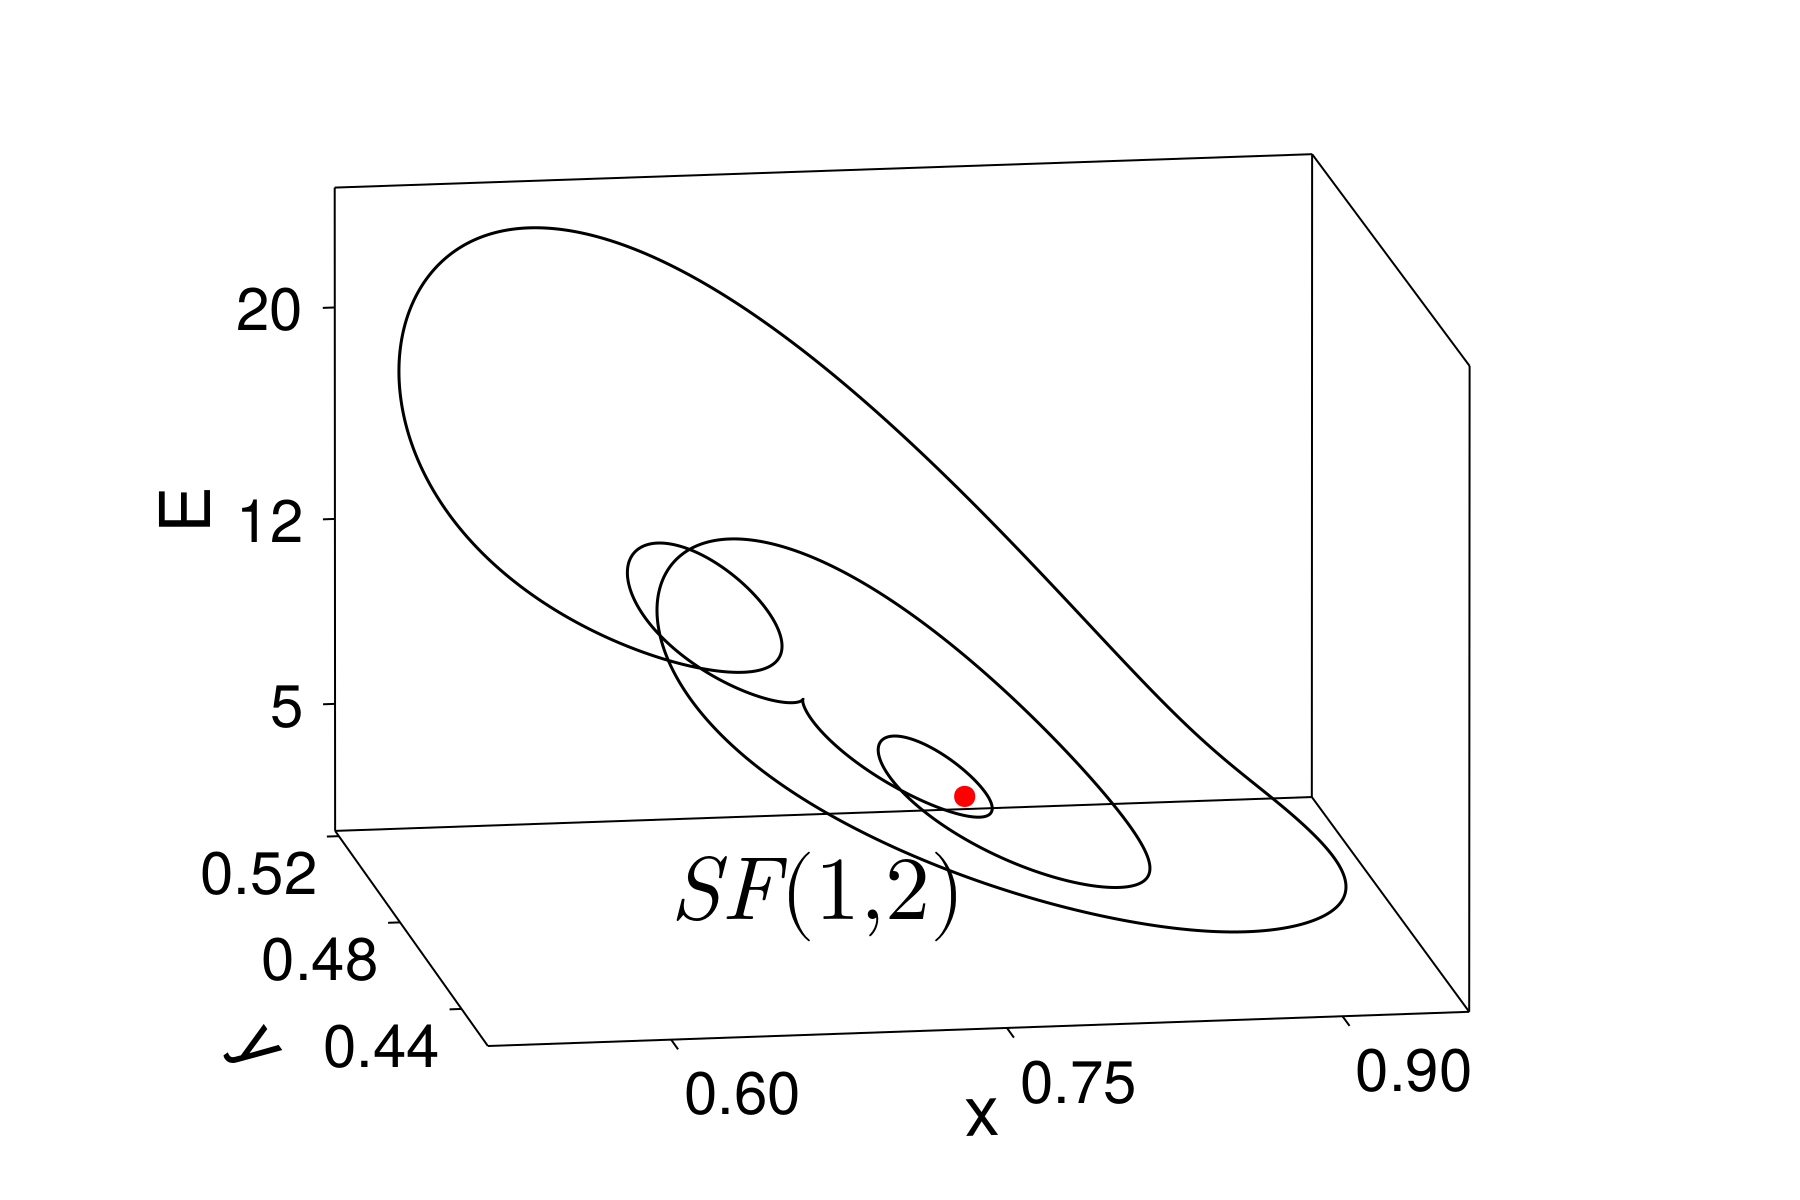

CairoMakie.Screen{IMAGE}


In [38]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(size = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.55pi, elevation = 0.07pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            xticks = [0.6, 0.75, 0.9], yticks = [0.44, 0.48, 0.52], zticks = [5, 12, 20])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

In [11]:
save("phase_second_type_activity.eps", f)

CairoMakie.Screen{EPS}


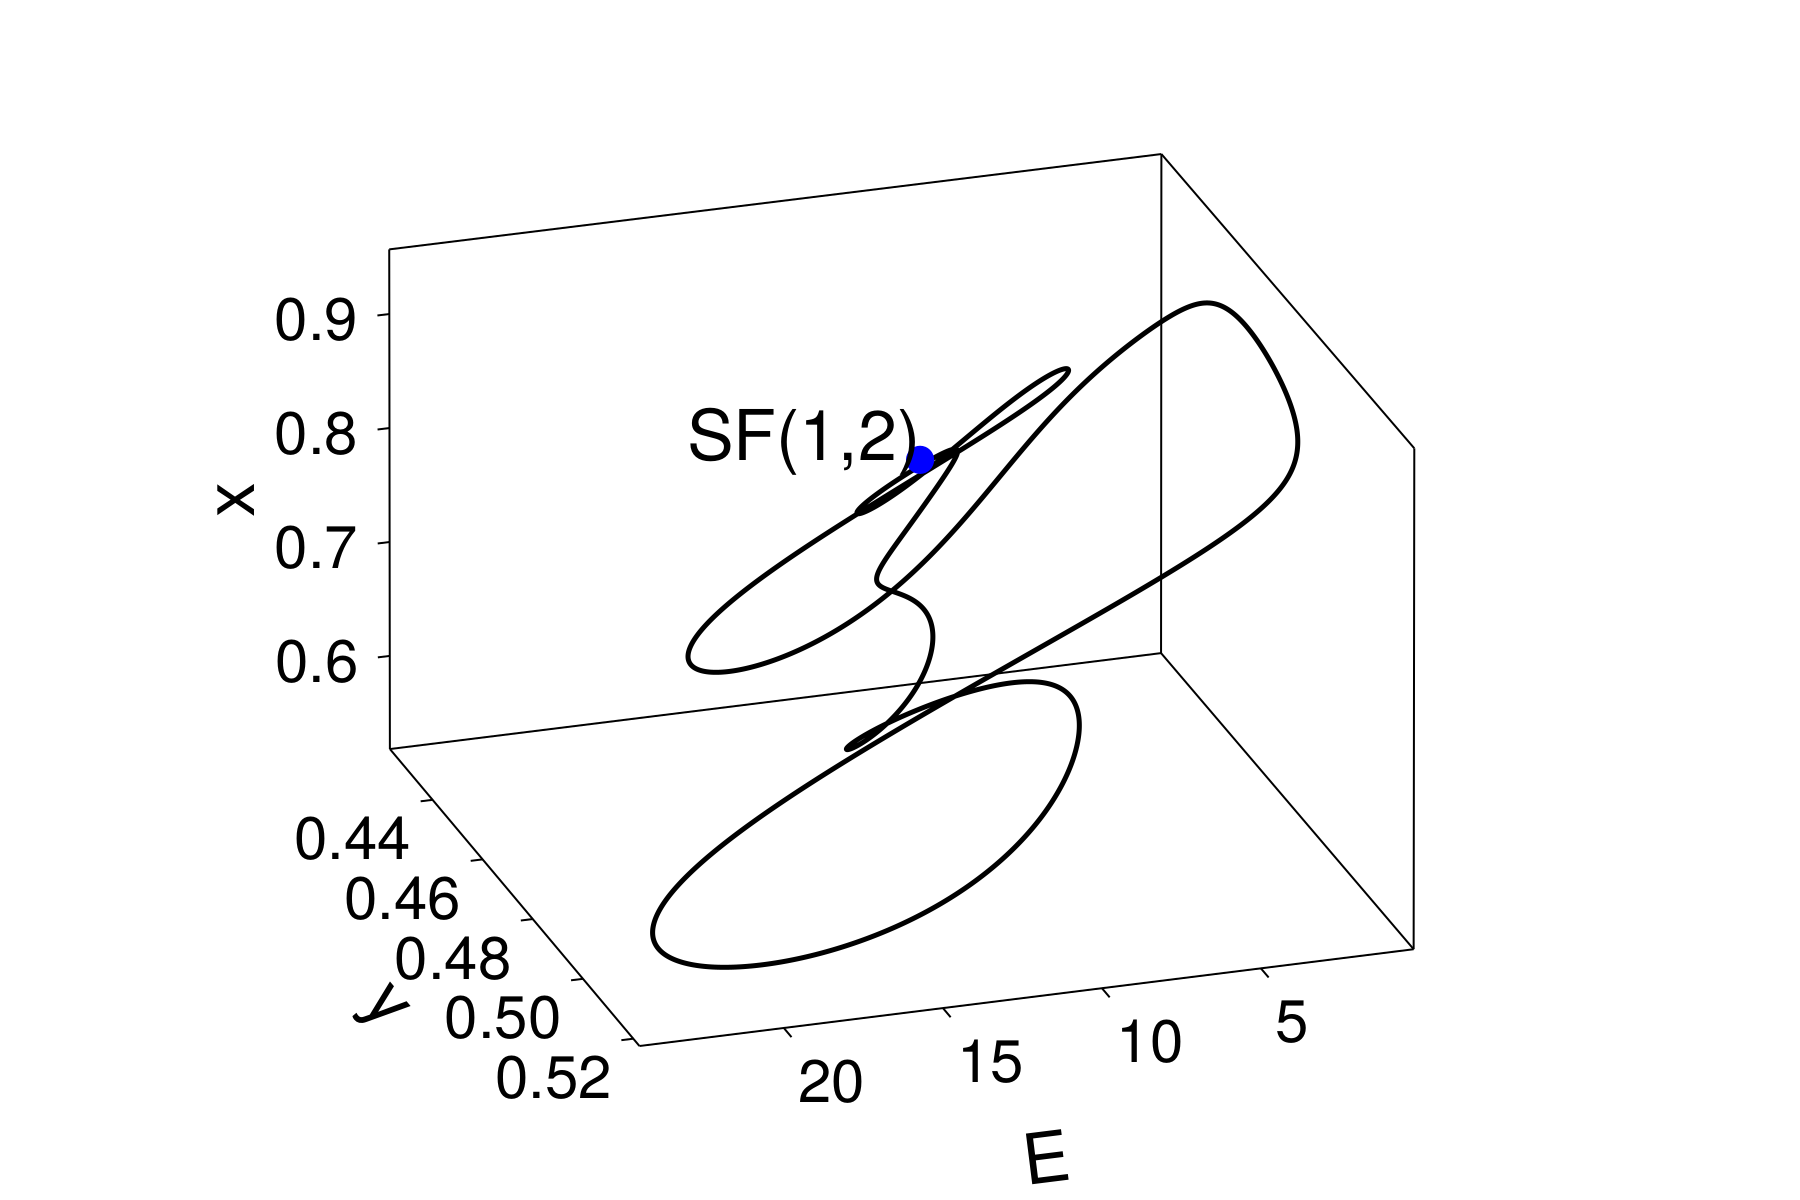

CairoMakie.Screen{IMAGE}


In [37]:
ts, tf = 500000, 520000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(size = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)
            #yticks = [0.43, 0.45, 0.48])

#ax = LScene(f[1, 1])

#scale!(ax.scene, 1, 50, 50)

lines!(sol[idx,ts:tf], sol[idy,ts:tf], sol[idz,ts:tf],
    linewidth = 2.5, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 20)
    text!(ep[idx], ep[idy], ep[idz],text = "SF(1,2)", fontsize = 35, align = (:right, :baseline))
end

display(f)

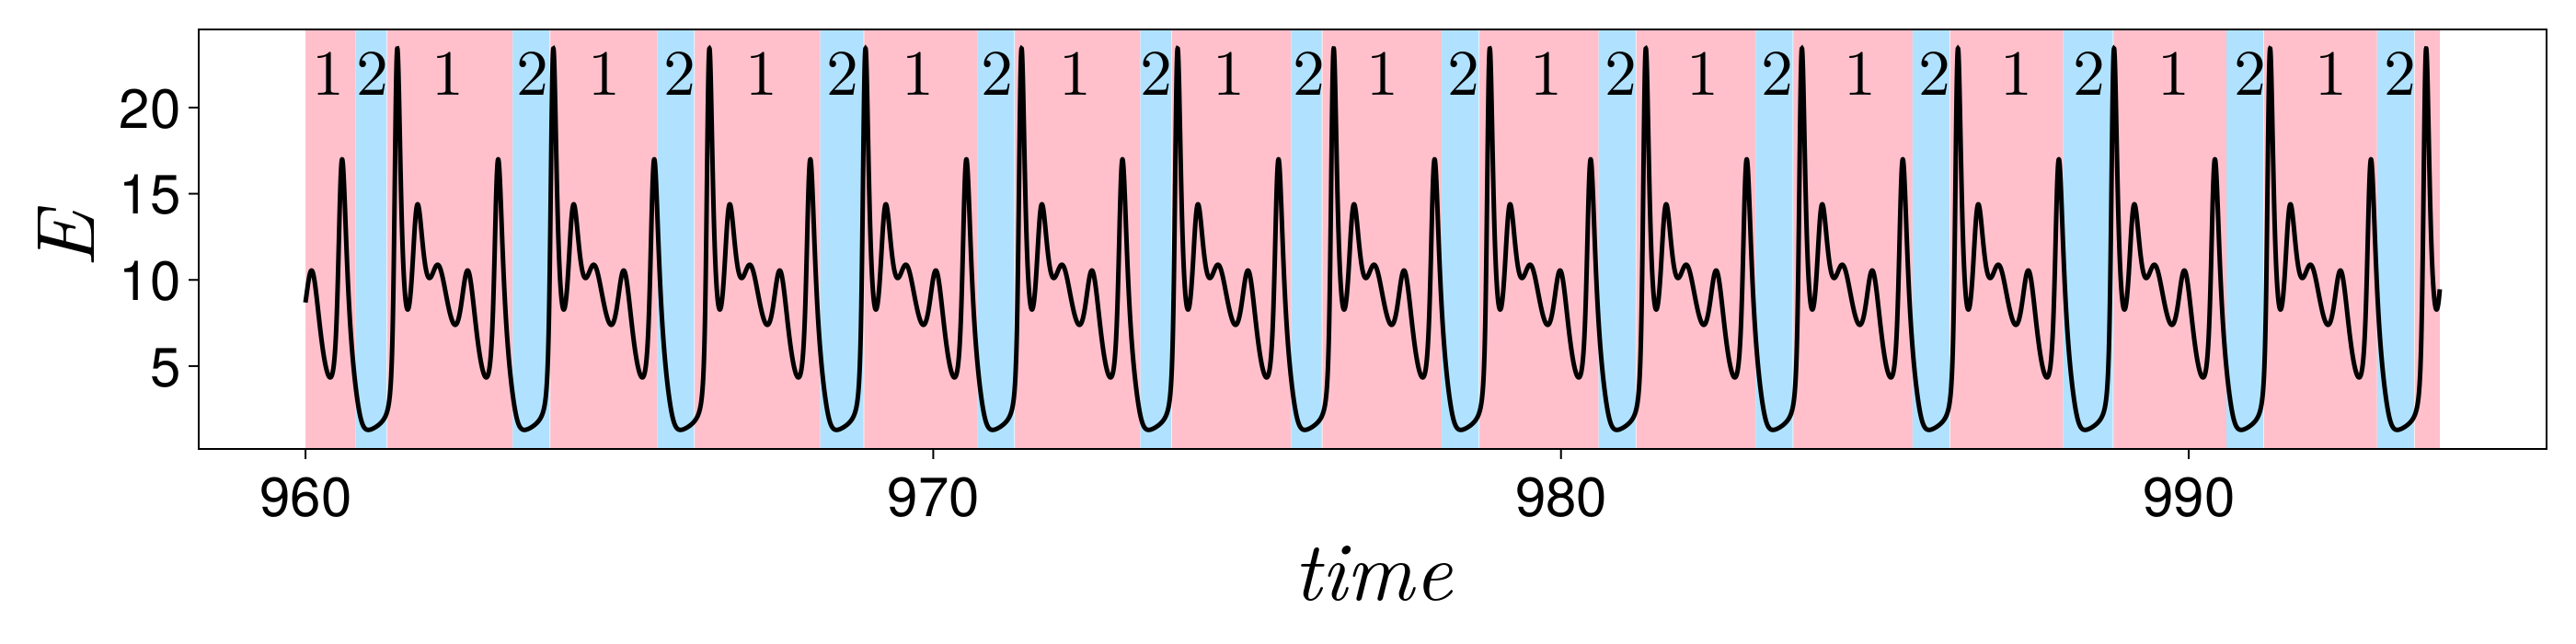

CairoMakie.Screen{IMAGE}


In [175]:
ts, tf = 960000, 994000
textsize = 35 
#50000, 70000 # 960000, 994000 # 500000, 580000

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(size = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

pinkst = [960, 961.3, 963.9, 966.2, 968.9, 971.3, 973.8, 976.2, 978.7, 981.2, 983.7, 986.2, 988.8, 991.2, 993.6]
pinkend = [960.8, 963.3, 965.6, 968.2, 970.7, 973.3, 975.7, 978.1, 980.6, 983.1, 985.6, 988.0, 990.6, 993.0, 994.0]

bluest =  [960.8, 963.3, 965.6, 968.2, 970.7, 973.3, 975.7, 978.1, 980.6, 983.1, 985.6, 988.0, 990.6, 993.0]
bluend = [961.29, 963.89, 966.19, 968.89, 971.29, 973.79, 976.19, 978.69, 981.19, 983.69, 986.19, 988.79, 991.19, 993.59]

vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)

text!(axis, 960.1, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 962.0, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 964.5, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 967.0, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 969.5, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 972.0, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 974.45, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 976.9, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 979.5, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 982.0, 20,  text = L"1", fontsize = textsize, color = :black) 
text!(axis, 984.5, 20,  text = L"1", fontsize = textsize, color = :black) 
text!(axis, 987.0, 20,  text = L"1", fontsize = textsize, color = :black) 
text!(axis, 989.5, 20,  text = L"1", fontsize = textsize, color = :black) 
text!(axis, 992.0, 20,  text = L"1", fontsize = textsize, color = :black) 


text!(axis, 960.8, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 963.35, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 965.7, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 968.3, 20,  text = L"2", fontsize = textsize, color = :black) 
text!(axis, 970.75, 20,  text = L"2", fontsize = textsize, color = :black) 
text!(axis, 973.29, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 975.72, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 978.18, 20,  text = L"2", fontsize = textsize, color = :black) 
text!(axis, 980.69, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 983.18, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 985.69, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 988.15, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 990.71, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 993.1, 20,  text = L"2", fontsize = textsize, color = :black)

lines!(axis, sol.t[ts:tf], sol[1, ts:tf], linewidth = 2.5, color = :black)
display(f)

In [176]:
save("ts_second_type_activity.eps", f)

CairoMakie.Screen{EPS}


In [64]:
#save("C:\\Users\\Alex\\Desktop\\phase_second_type_activity.pdf", f)